##### POST data-conditioning notebook--obtain and scrub
***

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

We need to take a look at `bedrooms`, `bathrooms`, and `floors`.

First, we will view their distributions as violinplots.

In [ ]:
# create a list of the 3 column names
out_list = ['bedrooms', 'bathrooms', 'floors']

# Subplot 3 boxplots for 'bedrooms', 'bathrooms', and 'floors'
fig, ax = plt.subplots(3, 1) # 3 columns, 1 row
plt.suptitle(
    "Univariate Distributions for Categorical Outliers", va='bottom')
plt.subplots_adjust(wspace=.35, hspace=.8) # space between subplots
plot_space = 311 # location of first plot

for col in out_list:    
    plt.subplot(plot_space)
    sns.violinplot( col, data=data_2, color="orange", inner='quartiles')
    plt.title(col, fontsize=11, color='grey', loc='left', style='italic')
    plot_space += 1 # increment to the next row

# plt.show()

I would expect we could set a cut - off at about 6 bedrooms and 5 bathrooms. It doesn't look seem like `floors` would cause much of a problem.

In [4]:
for col in data_2.columns[2:]:
    if col not in ['lat', 'long', 'zipcode', 'date']:
        
        sns.violinplot( col, data=data_2, color="orange",
                       inner='quartiles')
        plt.title(col, fontsize=11, color='grey', loc='left', 
                  style='italic')

plt.show()



NameError: name 'col' is not defined

In [ ]:
# count of homes with more than 5 bathrooms
display(data_f.loc[data_f['bathrooms'] > 5, ['id'] ].count())

# count of homes with more than 6 bedrooms
data_f.loc[data_f['bedrooms'] > 6, ['id'] ].count()

So, that is what my eyes tell me. Let's see what the data tells us.

In [ ]:
''' a function that takes a dataframe and a list of columns
to view or count outlier rows based on the IQR rule
we only need the upper - bound
'''
def show_iqr_out(data, col_list):
    for cat in col_list:
        q1 = data[cat].quantile(0.25) # 1st quantile
        q3 = data[cat].quantile(0.75) # 2nd quantile
        iqr = q3 - q1 # innerquantile range
        #lower_range = q1 - (1.5 * iqr)
        upper_range = q3 + (1.5 * iqr)
        #below_lower = data[cat] < (lower_range) # below  lower range
        above_upper = data[cat] > (upper_range) # above upper range
        # print outliers
        # print(data[below_lower | above_upper][cat], "\n", "-"*72)
        #print(f"{cat} lower - bound {lower_range}:", 
              #data[below_lower][cat].count(), "\n", "-"*72)
        print(f"{cat} upper - bound {upper_range}:", 
              data[above_upper][cat].count(), "\n", "-"*72)

In [ ]:
# pass a list of columns to the function
show_iqr_out(data_f, ['bedrooms', 'bathrooms', 'floors'])

Dropping homes with just 4-or-more bathrooms is quite a bit less forgiving than my eyes. Oh, well.

Let's trim them, first preserving the dataframe in its current state.

### Remove outliers from `data_f`

In [ ]:
# writing a loop based on `show_iqr_out` that drops rows
# for IQR upper - bound outliers
col_list = ['bedrooms', 'bathrooms']

print("shape before outlier removal: ", data_f.shape, "\n", "-"*72)

for cat in col_list:
    q1 = data_f[cat].quantile(0.25)
    q3 = data_f[cat].quantile(0.75)
    iqr = q3 - q1
    upper_range = q3 + (1.5 * iqr)
    data_f.drop(data_f[ data_f[cat] > (upper_range)
                            ].index , inplace=True)

print("\nshape after outlier removal: ", data_f.shape)

In [ ]:
# review boxplots for the outlier - cleaned columns
fig, ax = plt.subplots(2, 1)
plt.subplots_adjust(wspace=.35, hspace=.8) # space between subplots

plt.subplot(211)
plt.suptitle("Categorical Univariate Distributions", va='bottom')
sns.violinplot( 'bedrooms', data=data_f, color="orange", inner='quartiles')
plt.title('bedrooms', fontsize=11, color='grey', loc='left', style='italic')
plt.subplot(212)
sns.violinplot( 'bathrooms', data=data_f, color="green", inner='quartiles')
plt.title('bathrooms', fontsize=11, color='grey', loc='left', style='italic')


# plt.show()

> Those appear to be a bit more central than before.

#  ------------------Exploring

# CORRELATION

## Assumptions for Linear Regression

## Linearity & Normality of Residuals

# OLS1

# TRAIN - TEST - model

## Collinearity

## Feature Elimination and Engineering

# K - FOLD

# -----------MODELING

# OLS2

# K - FOLD2

# Dealing with Categorical Data

Creating binary columns for categorical data: `Renovated` and `waterfront` are already binary, so we do not want to create new columns for them.

# MODEL IMPROVEMENTS

# SUMMARY - interpret

We can convert `grade` to an ordered category.

In [177]:
# grade_dtype = pd.api.types.CategoricalDtype(
#     categories=[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], ordered=True)

# # verify the category
# data_f.grade.astype(grade_dtype)

In [178]:
# category order is confirmed
# convert `grade` to the ordered category
# data_f.grade = data_f.grade.astype(grade_dtype)
# data_f.grade.dtype

Convert `condition` to an ordered category.

In [180]:
# condition_dtype = pd.api.types.CategoricalDtype(
#     categories=[1, 2, 3, 4, 5], ordered=True)

# # convert `condition` to an ordered category
# data_f.condition = data_f.condition.astype(condition_dtype)
# data_f.condition.dtype

`bedrooms`

In [ ]:
display(data_f.bedrooms.unique())

In [ ]:
# create an ordered 'bedrooms' dtype
bedrooms_dtype = pd.api.types.CategoricalDtype(
    categories=[1,  2,  3,  4,  5], ordered=True)

# convert `condition` to an ordered category
data_f.bedrooms = data_f.bedrooms.astype(bedrooms_dtype)
data_f.bedrooms.dtype

`floors`

In [ ]:
data_f.floors.value_counts()

I am curious about those 3.5 floors homes. Let's take a look at them.

In [ ]:
# view homes with 3.5 floors
data_f[data_f.floors == 3.5]

They seem valid enough.

#### Converting `floors` to an ordered category.

In [ ]:
# create an ordered 'floors' dtype
floors_dtype = pd.api.types.CategoricalDtype(
    categories=[1,  1.5,  2,  2.5,  3,  3.5], ordered=True)

# convert `condition` to an ordered category
data_f.floors = data_f.floors.astype(floors_dtype)
data_f.floors.dtype

`bathrooms`

In [ ]:
display(data_f.bathrooms.dtype)
data_f.bathrooms.unique()

> Instead of converting this column to a category data type, we will want to work on all of those partial baths.

## Binning `bathrooms`

To manage the half- and quarter- baths, we can group values into bins in the style '.5' for less than 1, '1' for homes with at least one and fewer than two bathroom(s), etc.

In [ ]:
# what unique values do we currently have?
data_f.sort_values(by='bathrooms').bathrooms.unique()

Currently, we have 15 unique values. Binning should reduce this to a more manageable 4.

In [ ]:
# adding a new bathroom bins column next to the `bathrooms` group
# bins are exclusive of 0 and inclusive of 4
bath_cats = pd.cut(data_f.bathrooms, 
                   bins=[0, .9, 1.9, 2.9, 3.9, 4], 
                   labels=['.5','1',
                           '2','3', '4'])
#insert next to `bathrooms` column
data_f.insert(5,'Full_baths', bath_cats)

In [ ]:
# view some rows with various bathroom counts
pd.set_option('display.max_rows', 20)
display(data_f.iloc[70:77, 4:6])

# display bin column data type
data_f.Full_baths.dtype

We see the bin labels have become categories for the new column.

In [ ]:
# view rows with partial bathrooms
data_f.loc[data_f['bathrooms'] < 1].head()

We can now drop the `baths` column.

In [ ]:
# drop `bathrooms`
data_f.drop('bathrooms', axis=1, inplace=True)

## Getting Dummies

In [ ]:
# create a list of categorical column names
cat_list = [col for col in data_f.select_dtypes(include=['category']).columns]

print(cat_list)

Now we can create binary columns for our categorical variables (those that already are not).

In [ ]:
print([col for col in data_f.columns if (
        2 < len(data_f[col].unique()) < 15)])

In [ ]:
'''test creating a list of categorical columns 
with more than 2 unique values--verifying only categorical columns 
satisfy the condition and only those that are not already binary
'''
cat_list = []

# run in a function, for use after changing the dataframe's name
def build_cat(dframe): 
    cat_pen = [col for col in dframe.columns if (
        2 < len(dframe[col].unique()) < 15)]
    cat_list.extend(cat_pen)
    return print("cat_list updated")

In [ ]:
# checking work: run the function
build_cat(data_f)

print("\nCategorical variables: ", cat_list)
print("-"*72)
no_cat = [col for col in data_f.columns if col not in cat_list]
print("\nRemaining variables: ", no_cat)

Since there are about to be a lot more columns in `data_f` as we expand categorical variables, let's preserve this state of the dataframe and create a copy.

## Pickle the current - state dataframe

Store the `data_f` dataframe in a sub - directory of the repository as `data_f_no_hots`.

In [ ]:
with open('data/data_f_no_hots.pickle', 'wb') as f:
    # Pickling the 'data_f' dataframe using the highest protocol available.
    pickle.dump(data_f, f, pickle.HIGHEST_PROTOCOL)

Making a copy of the dataframe with a new name `data_b`.

In [ ]:
# copy the dataframe
data_b = data_f.copy()

# view the first row of the dataframe copy
data_b.head(1)

### Buiding a list of categorical variables and one - hot encoding listed columns

In [ ]:
# viewing dataframe shape before processing
print(data_b.shape)

# resetting our `cat_list`
cat_list = []

# runnning our function on the new dataframe
build_cat(data_b)

# vefify cat_list
print(cat_list)

In [ ]:
# check the `view` dtypes
data_b['view'].unique()

In [ ]:
# reorder the `view` dtypes, ascending
data_b['view'].cat.reorder_categories(
    [0, 1, 2, 3, 4]
)

data_b['view'].dtype

## One - hot Encoding

The loop in the next cell will:
* create dummies (boolean columns) for column names in our `cat_list`
* concatenate each new column to the dataframe, and
* drop the original columns.

#### Here goes something...

In [ ]:
# generate dummies for listed columns
for col in data_b.columns:
    if col in cat_list:
        data_b = pd.concat([data_b, pd.get_dummies(data_b[col], prefix=col,
                                          # not treating nulls as a separate category
                                          # since we no longer have any
                                          dummy_na=False
                                          # drop the original column
                                          )], axis=1).drop([col], axis=1)

In [ ]:
# view info and the first row of the dataframe
display(data_b.info())
data_b.head(1)

### One more nulls check for the road

In [ ]:
# How many values are null in the database
data_b.isna().sum().sum()

In [ ]:
display(data_b.describe())
data_b.head(1)

#### Parking Lot

In [ ]:
# using scipy's z-score function to detect outliers
#z = np.abs(stats.zscore(_df))

# setting a threshold for a z-score of 3
#display(np.where(z > 3))

In [ ]:
# the first outlier is in row 1 at column 18
# display(out_df.iloc[1:2, 17:18]) # 
# display(out_df.loc[1, 'sqft_lot15'])
# print(z[1][18])

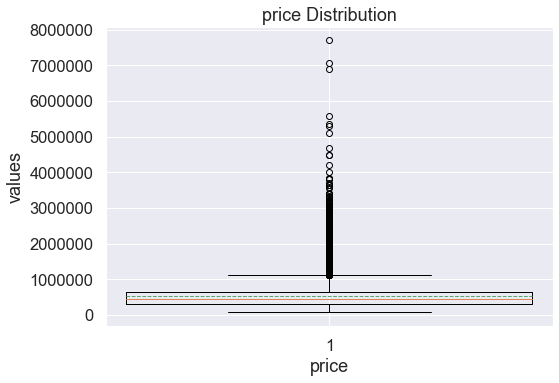

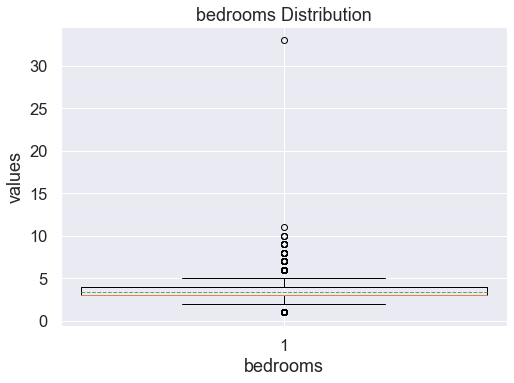

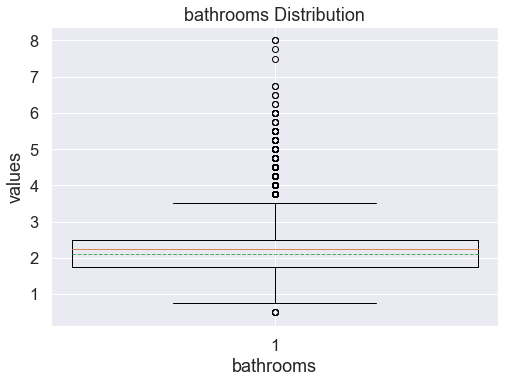

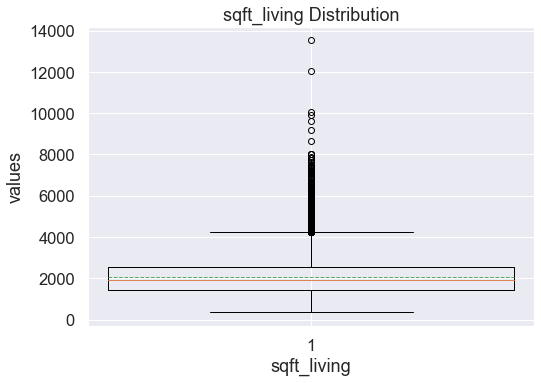

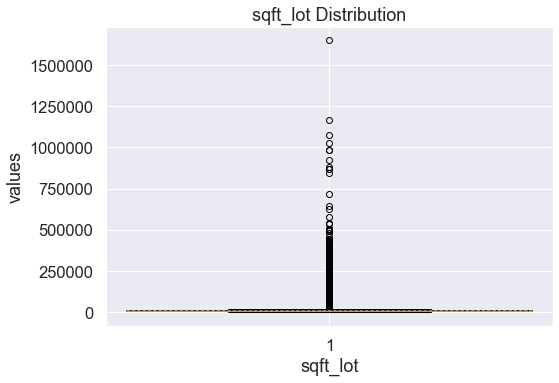

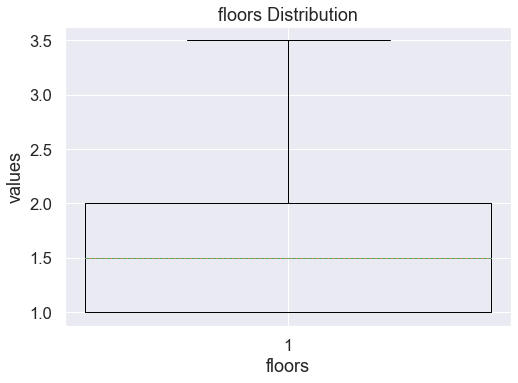

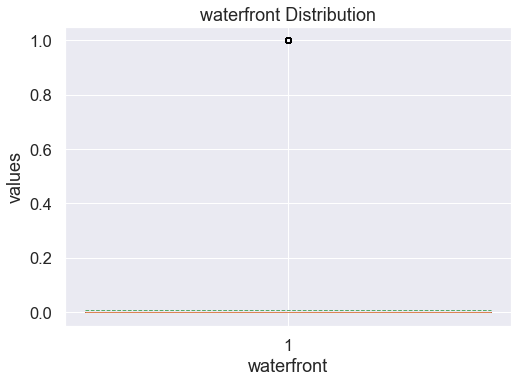

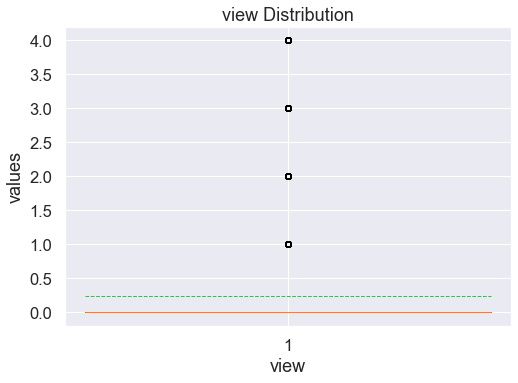

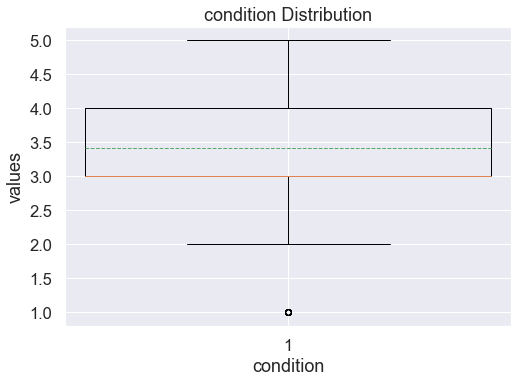

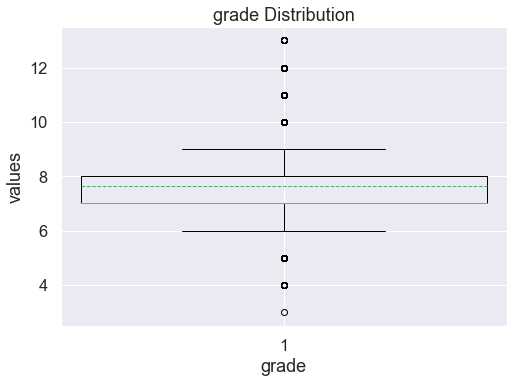

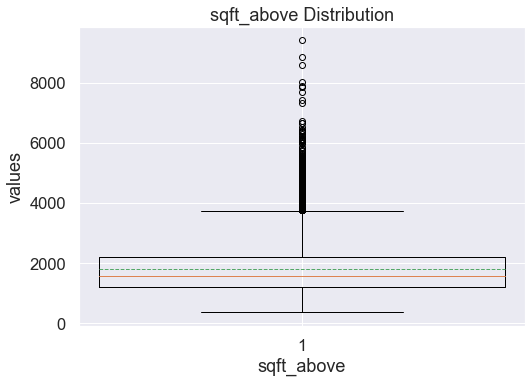

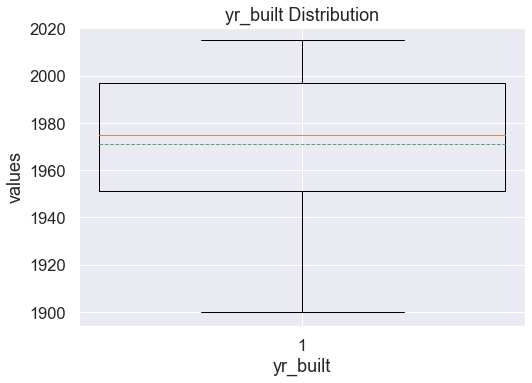

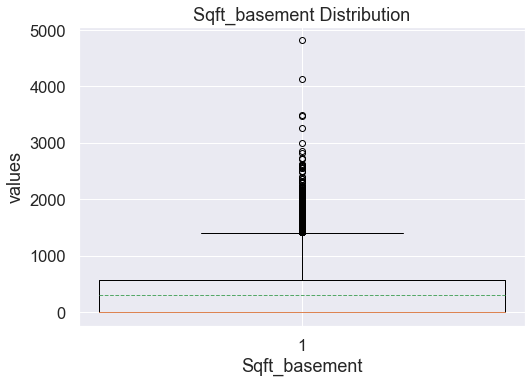

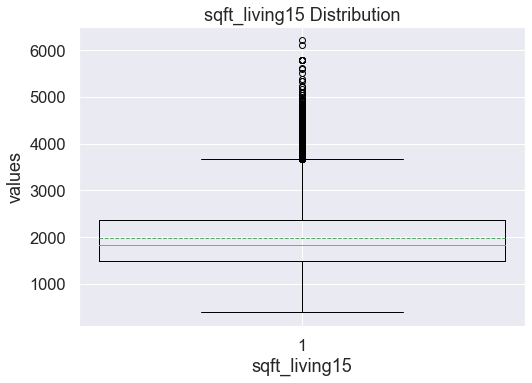

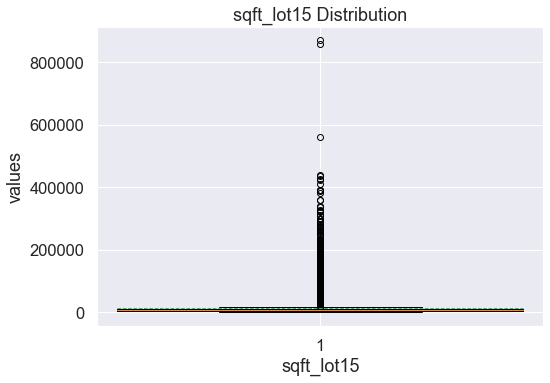

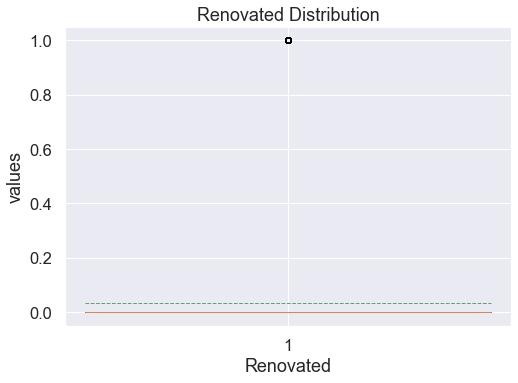

In [88]:
# data_f.hist(grid=False, bins=30)
# selecting plot styling
plt.style.use('seaborn')
sns.set(font_scale=1.5)  # making labels legible

# #plotting histograms in matplotlib
for col in data_2.columns[2:]:
    if col not in ['lat', 'long', 'zipcode', 'date']:
        # Draw the figure
        fig, (ax1) = plt.subplots(ncols=1)
        plt.subplots_adjust(wspace=.75, hspace=.35)
        # Make the plot
        ax1.set_title(f"{col} Distribution")
        ax1.boxplot(data_2[col], showmeans=True, meanline=True)
        ax1.set_xlabel(f"{col}")
        ax1.set_ylabel(r"values")

plt.show()